# MadMiner particle physics tutorial

# Part 4b: The Fisher information

Johann Brehmer, Felix Kling, Irina Espejo, and Kyle Cranmer 2018-2019

## 0. Preparations

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import six
import logging
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

from madminer.fisherinformation import FisherInformation
from madminer.plotting import plot_fisher_information_contours_2d


In [2]:
# MadMiner output
logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.INFO
)

# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

## 1. Calculating the Fisher information

We can use SALLY estimators (see part 3b of this tutorial) not just to define optimal observables, but also to calculate the (expected) Fisher information in a process. In `madminer.fisherinformation` we provide the `FisherInformation` class that makes this more convenient.

In [3]:
fisher = FisherInformation('data/lhe_data_shuffled.h5')
# fisher = FisherInformation('data/delphes_data_shuffled.h5')

11:10 madminer.analysis    INFO    Loading data from data/lhe_data_shuffled.h5
11:10 madminer.analysis    INFO    Found 2 parameters
11:10 madminer.analysis    INFO    Did not find nuisance parameters
11:10 madminer.analysis    INFO    Found 6 benchmarks, of which 6 physical
11:10 madminer.analysis    INFO    Found 3 observables
11:10 madminer.analysis    INFO    Found 15030 events
11:10 madminer.analysis    INFO    Found morphing setup with 6 components
11:10 madminer.analysis    INFO    Did not find nuisance morphing setup


This class provides different functions:
- `calculate_fisher_information_rate()` calculates the Fisher information in total rates,
- `calculate_fisher_information_hist1d()` calculates the Fisher information in 1D histograms,
- `calculate_fisher_information_hist2d()` calculates the Fisher information in 2D histograms,
- `calculate_fisher_information_full_detector()` calculates the full detector-level Fisher information using a SALLY estimator, and
- `calculate_fisher_information_full_truth()` calculates the truth-level Fisher information.

Here we use the SALLY approach:

In [4]:
fisher_information, _ = fisher.calculate_fisher_information_full_detector(
    theta=[0.,0.],
    model_file='models/sally',
    luminosity=30000.,
)

print('Fisher information after 30 ifb:\n{}'.format(fisher_information))

11:10 madminer.fisherinfor INFO    Found 2 parameters in SALLY model, matching 2 physical parameters in MadMiner file
11:10 madminer.fisherinfor INFO    Evaluating rate Fisher information
11:10 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 1


Fisher information after 30 ifb:
[[9.64206944 0.68312743]
 [0.68312743 8.25388798]]


For comparison, we can calculate the Fisher information in the histogram of observables:

In [5]:
info_histo_1d, cov_histo_1d = fisher.calculate_fisher_information_hist1d(
    theta=[0.,0.],
    luminosity=30000.,
    observable="pt_j1",
    bins=[30.,100.,200.,400.],
    histrange=[30.,400.],
)

print('Histogram Fisher information after 30 ifb:\n{}'.format(info_histo_1d))

11:10 madminer.fisherinfor INFO    Bins with largest statistical uncertainties on rates:
11:10 madminer.fisherinfor INFO      Bin 1: (0.0085 +/- 0.0031) fb (36.4223 %)
11:10 madminer.fisherinfor INFO      Bin 3: (0.3612 +/- 0.0471) fb (13.0365 %)
11:10 madminer.fisherinfor INFO      Bin 5: (0.0030 +/- 0.0003) fb (10.7680 %)
11:10 madminer.fisherinfor INFO      Bin 2: (0.6017 +/- 0.0508) fb (8.4371 %)
11:10 madminer.fisherinfor INFO      Bin 4: (0.0520 +/- 0.0028) fb (5.3161 %)


Histogram Fisher information after 30 ifb:
[[6.45101184e+00 3.22227641e-02]
 [3.22227641e-02 5.14855738e-03]]


We can do the same thing in 2D:

In [6]:
info_histo_2d, cov_histo_2d = fisher.calculate_fisher_information_hist2d(
    theta=[0.,0.],
    luminosity=30000.,
    observable1="pt_j1",
    bins1=[30.,100.,200.,400.],
    histrange1=[30.,400.],
    observable2="delta_phi_jj",
    bins2=5,
    histrange2=[0.,6.2],
)

print('Histogram Fisher information after 30 ifb:\n{}'.format(info_histo_2d))

11:10 madminer.fisherinfor INFO    Bins with largest statistical uncertainties on rates:
11:10 madminer.fisherinfor INFO      Bin (1, 2): (0.0033 +/- 0.0026) fb (78.0906 %)
11:10 madminer.fisherinfor INFO      Bin (6, 5): (0.0005 +/- 0.0002) fb (50.9767 %)
11:10 madminer.fisherinfor INFO      Bin (4, 3): (0.0831 +/- 0.0380) fb (45.7958 %)
11:10 madminer.fisherinfor INFO      Bin (1, 1): (0.0041 +/- 0.0017) fb (40.8387 %)
11:10 madminer.fisherinfor INFO      Bin (1, 4): (0.0003 +/- 0.0001) fb (26.7261 %)


Histogram Fisher information after 30 ifb:
[[7.20570573 0.33434335]
 [0.33434335 6.21207077]]


/Users/johannbrehmer/work/projects/madminer/madminer/madminer/fisherinformation.py:1063: RuntimeWarning: divide by zero encountered in true_divide
  inv_sigma = sanitize_array(1.0 / sigma)  # Shape (n_events,)


## 2. Plot Fisher distances

We also provide a convenience function to plot contours of constant Fisher distance `d^2(theta, theta_ref) = I_ij(theta_ref) * (theta-theta_ref)_i * (theta-theta_ref)_j`:

In [15]:
plot_fisher_information_contours_2d?

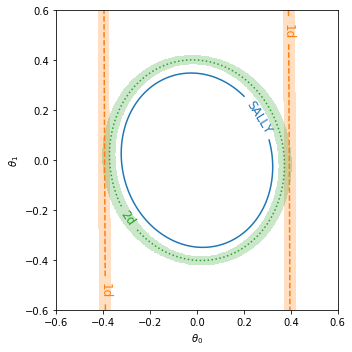

In [17]:
_ = plot_fisher_information_contours_2d(
    [fisher_information, info_histo_1d, info_histo_2d],
    [None, cov_histo_1d, cov_histo_2d],
    inline_labels=["SALLY", "1d", "2d"],
    xrange=(-0.6,0.6),
    yrange=(-0.6,0.6)
)